In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
import requests

url = "https://api.polygon.io/v2/aggs/ticker/AAPL/range/1/day/2025-07-16/2025-10-15?adjusted=true&sort=asc&limit=120&apiKey=zdSn6N7gPxSVJ59iqV7ZP5BkWR0I6ttA"    # Replace by the URL you found before
api_data = requests.get(url).json()

In [3]:
api_data

{'ticker': 'AAPL',
 'queryCount': 65,
 'resultsCount': 65,
 'adjusted': True,
 'results': [{'v': 47490532.0,
   'vw': 210.3633,
   'o': 210.295,
   'c': 210.16,
   'h': 212.4,
   'l': 208.64,
   't': 1752638400000,
   'n': 535850},
  {'v': 48068141.0,
   'vw': 210.5606,
   'o': 210.57,
   'c': 210.02,
   'h': 211.8,
   'l': 209.59,
   't': 1752724800000,
   'n': 574972},
  {'v': 48974591.0,
   'vw': 210.8567,
   'o': 210.87,
   'c': 211.18,
   'h': 211.79,
   'l': 209.7045,
   't': 1752811200000,
   'n': 478858},
  {'v': 51377434.0,
   'vw': 213.3495,
   'o': 212.1,
   'c': 212.48,
   'h': 215.78,
   'l': 211.63,
   't': 1753070400000,
   'n': 651657},
  {'v': 46404072.0,
   'vw': 213.6492,
   'o': 213.14,
   'c': 214.4,
   'h': 214.95,
   'l': 212.2301,
   't': 1753156800000,
   'n': 549182},
  {'v': 46989301.0,
   'vw': 213.7982,
   'o': 215,
   'c': 214.15,
   'h': 215.15,
   'l': 212.41,
   't': 1753243200000,
   'n': 497904},
  {'v': 46022620.0,
   'vw': 214.3924,
   'o': 213.9,
 

In [5]:
apple_df = pd.DataFrame(api_data['results'])
apple_df

,v,vw,o,c,h,l,t,n
0,47490532.0,210.3633,210.295,210.16,212.400,208.6400,1752638400000,535850
1,48068141.0,210.5606,210.570,210.02,211.800,209.5900,1752724800000,574972
2,48974591.0,210.8567,210.870,211.18,211.790,209.7045,1752811200000,478858
3,51377434.0,213.3495,212.100,212.48,215.780,211.6300,1753070400000,651657
4,46404072.0,213.6492,213.140,214.40,214.950,212.2301,1753156800000,549182
...,...,...,...,...,...,...,...,...
60,38322012.0,254.5102,257.805,254.04,258.000,253.1400,1759982400000,536585
61,61999098.0,248.3661,254.940,245.27,256.380,244.0000,1760068800000,908253
62,38142942.0,247.9036,249.380,247.66,249.690,245.5600,1760328000000,614923
63,35477986.0,247.3488,246.600,247.77,248.845,244.7000,1760414400000,533528


In [15]:

apple_df['t'] = pd.to_datetime(apple_df['t'], unit='ms')

KeyError: 't'

In [16]:
apple_df

,v,vw,o,c,h,l,n
date,,,,,,,
2025-07-16 04:00:00,47490532.0,210.3633,210.295,210.16,212.400,208.6400,535850
2025-07-17 04:00:00,48068141.0,210.5606,210.570,210.02,211.800,209.5900,574972
2025-07-18 04:00:00,48974591.0,210.8567,210.870,211.18,211.790,209.7045,478858
2025-07-21 04:00:00,51377434.0,213.3495,212.100,212.48,215.780,211.6300,651657
2025-07-22 04:00:00,46404072.0,213.6492,213.140,214.40,214.950,212.2301,549182
...,...,...,...,...,...,...,...
2025-10-09 04:00:00,38322012.0,254.5102,257.805,254.04,258.000,253.1400,536585
2025-10-10 04:00:00,61999098.0,248.3661,254.940,245.27,256.380,244.0000,908253
2025-10-13 04:00:00,38142942.0,247.9036,249.380,247.66,249.690,245.5600,614923


In [17]:
apple_df.rename(columns={
    'v': 'volume',
    'vw': 'volume_weighted_price',
    'o': 'open',
    'c': 'close',
    'h': 'high',
    'l': 'low',
    't': 'date',
    'n': 'transactions'
}, inplace=True)


In [19]:
apple_df

,volume,volume_weighted_price,open,close,high,low,transactions
date,,,,,,,
2025-07-16 04:00:00,47490532.0,210.3633,210.295,210.16,212.400,208.6400,535850
2025-07-17 04:00:00,48068141.0,210.5606,210.570,210.02,211.800,209.5900,574972
2025-07-18 04:00:00,48974591.0,210.8567,210.870,211.18,211.790,209.7045,478858
2025-07-21 04:00:00,51377434.0,213.3495,212.100,212.48,215.780,211.6300,651657
2025-07-22 04:00:00,46404072.0,213.6492,213.140,214.40,214.950,212.2301,549182
...,...,...,...,...,...,...,...
2025-10-09 04:00:00,38322012.0,254.5102,257.805,254.04,258.000,253.1400,536585
2025-10-10 04:00:00,61999098.0,248.3661,254.940,245.27,256.380,244.0000,908253
2025-10-13 04:00:00,38142942.0,247.9036,249.380,247.66,249.690,245.5600,614923


<Axes: xlabel='date'>

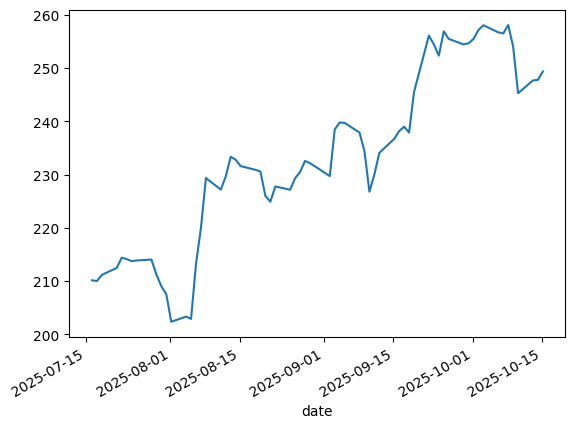

In [21]:
apple_df["close"].plot()

In [22]:
from nbresult import ChallengeResult

result = ChallengeResult('apple',
    index_name=apple_df.index.name,
    index_type=apple_df.index.dtype,
    columns=apple_df.columns
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/simonhingant/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/simonhingant/code/simsam56/02-Data-Toolkit/02-Data-Sourcing/data-stock-market-api/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 3 items

test_apple.py::TestApple::test_apple_df_columns PASSED                   [ 33%]
test_apple.py::TestApple::test_apple_df_index_is_timestamp PASSED        [ 66%]
test_apple.py::TestApple::test_apple_df_index_name_is_date PASSED        [100%]

============================== 3 passed in 0.48s ===============================


💯 You can commit your code:

git add tests/apple.pickle

git commit -m 'Completed apple step'

git push origin master



<Axes: xlabel='date'>

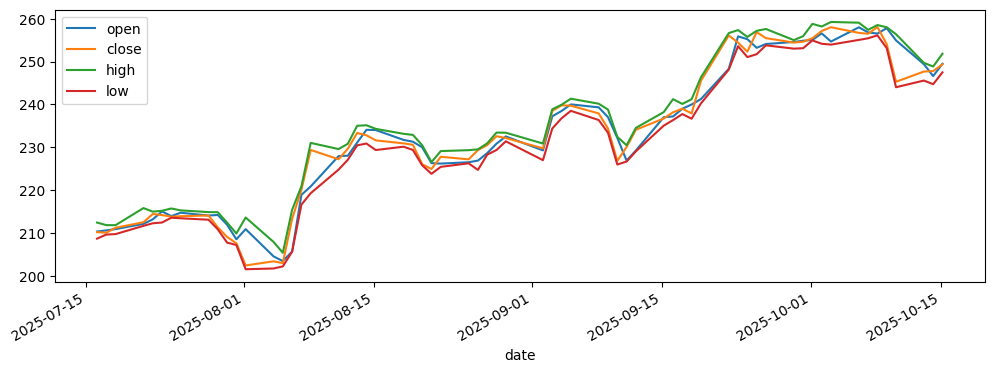

In [28]:
apple_df[['open', 'close', 'high', 'low']].plot(figsize=(12,4))

In [19]:
import requests


def create_stock_df_of_company(company_code):
    url = f"https://api.polygon.io/v2/aggs/ticker/{company_code}/range/1/day/2025-07-16/2025-10-15?adjusted=true&sort=asc&limit=120&apiKey=zdSn6N7gPxSVJ59iqV7ZP5BkWR0I6ttA"    # Replace by the URL you found before
    api_data1 = requests.get(url).json()
    company_df = pd.DataFrame(api_data['results'])
    company_df['t'] = pd.to_datetime(company_df['t'], unit='ms')
    company_df.rename(columns={
        'v': 'volume',
        'vw': 'volume_weighted_price',
        'o': 'open',
        'c': 'close',
        'h': 'high',
        'l': 'low',
        't': 'date',
        'n': 'transactions'
    }, inplace=True)
    return company_df
    
apple_df= create_stock_df_of_company("AAPL")


#AAPL
#AMZN
#META
#GOOGL


,volume,volume_weighted_price,open,close,high,low,date,transactions
0,47490532.0,210.3633,210.295,210.16,212.400,208.6400,2025-07-16 04:00:00,535850
1,48068141.0,210.5606,210.570,210.02,211.800,209.5900,2025-07-17 04:00:00,574972
2,48974591.0,210.8567,210.870,211.18,211.790,209.7045,2025-07-18 04:00:00,478858
3,51377434.0,213.3495,212.100,212.48,215.780,211.6300,2025-07-21 04:00:00,651657
4,46404072.0,213.6492,213.140,214.40,214.950,212.2301,2025-07-22 04:00:00,549182
...,...,...,...,...,...,...,...,...
60,38322012.0,254.5102,257.805,254.04,258.000,253.1400,2025-10-09 04:00:00,536585
61,61999098.0,248.3661,254.940,245.27,256.380,244.0000,2025-10-10 04:00:00,908253
62,38142942.0,247.9036,249.380,247.66,249.690,245.5600,2025-10-13 04:00:00,614923
63,35477986.0,247.3488,246.600,247.77,248.845,244.7000,2025-10-14 04:00:00,533528
